<a href="https://colab.research.google.com/github/reedhodges/udemy_pytorch_course/blob/main/udemy_course_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification

In [201]:
import sklearn

In [202]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [203]:
len(X), len(y)

(1000, 1000)

In [204]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")


First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [205]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


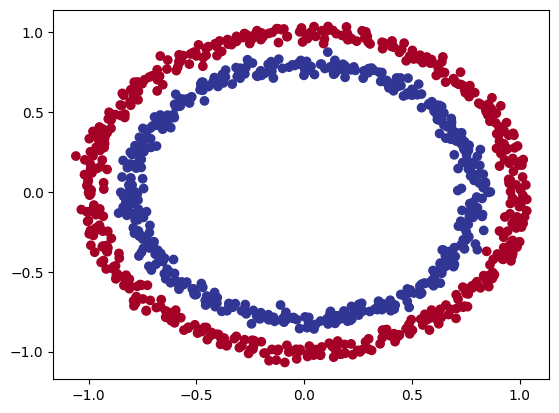

In [206]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [207]:
# so we are predicting whether a dot is part of the red circle or blue circle

In [208]:
X.shape, y.shape

((1000, 2), (1000,))

In [209]:
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample}\nand for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape}\nand for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074]
and for y: 1
Shapes for one sample of X: (2,)
and for y: ()


In [210]:
# time to convert to tensors

In [211]:
import torch
torch.__version__

'2.1.0+cu121'

In [212]:
type(X)

numpy.ndarray

In [213]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [214]:
type(X)

torch.Tensor

In [215]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [216]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=42)

In [218]:
X_train.shape, y_test.shape

(torch.Size([800, 2]), torch.Size([200]))

In [219]:
# use device agnostic code

In [220]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [221]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # create 2 linear layers capable of handling the shapes of our data
    # first in_feature must match shape of features, last out_feature must match shape of labels
    self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1)

  def forward(self, x):
    # x -> layer_1 -> layer_2 -> output
    return self.layer_2(self.layer_1(x))

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [222]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [223]:
# could also have done this with nn.Sequential, but not as customizable
model_0_alt = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)
model_0_alt

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [224]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.2060], device='cuda:0'))])

In [225]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [226]:
# time to set up loss function and optimizer

In [227]:
# binary cross entropy with sigmoid activation function
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

In [228]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [229]:
# our model outputs are raw logits
# we can convert these into prediction probabilities by passing
# them to an activtion function like sigmoid
# then we can convert the prediction probabilities to prediction labels
# by rounding them or taking argmax()

In [230]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]], device='cuda:0')

In [231]:
# need this to be in same format as
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [232]:
# use sigmoid activation function
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]], device='cuda:0')

In [233]:
# find predicted labels
y_preds = torch.round(y_pred_probs)

# this is the sequence in full:
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

In [234]:
# build and train testing loop

In [235]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # training mode
  model_0.train()

  # forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # loss and accuracy. Use y_logits as input since using BCEWithLogitsLoss()
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # optimizer zero grad
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step
  optimizer.step()

  # testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69569, Acc: 50.00% | Test loss: 0.69721, Test acc: 50.00%
Epoch: 10 | Loss: 0.69403, Acc: 50.00% | Test loss: 0.69615, Test acc: 50.00%
Epoch: 20 | Loss: 0.69343, Acc: 46.00% | Test loss: 0.69585, Test acc: 48.50%
Epoch: 30 | Loss: 0.69321, Acc: 49.00% | Test loss: 0.69577, Test acc: 47.50%
Epoch: 40 | Loss: 0.69312, Acc: 49.50% | Test loss: 0.69573, Test acc: 46.50%
Epoch: 50 | Loss: 0.69308, Acc: 50.38% | Test loss: 0.69569, Test acc: 46.50%
Epoch: 60 | Loss: 0.69306, Acc: 50.50% | Test loss: 0.69564, Test acc: 46.50%
Epoch: 70 | Loss: 0.69305, Acc: 50.50% | Test loss: 0.69559, Test acc: 46.50%
Epoch: 80 | Loss: 0.69304, Acc: 50.75% | Test loss: 0.69553, Test acc: 46.50%
Epoch: 90 | Loss: 0.69303, Acc: 50.38% | Test loss: 0.69547, Test acc: 46.50%


In [236]:
# this is not any better than random guessing; model isn't learning. Let's  visualize

In [237]:
# get helper function from course github repo
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


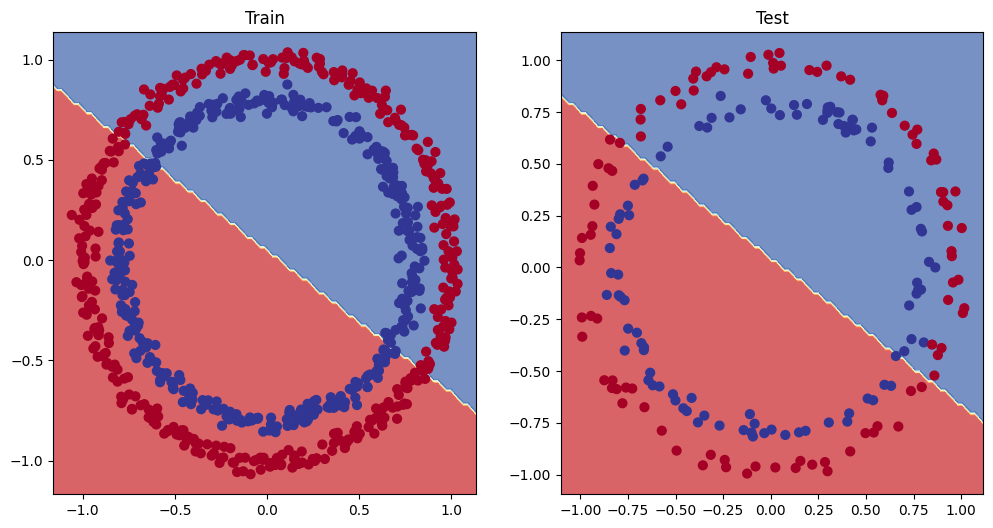

In [238]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [239]:
# clearly this is wrong

In [240]:
# could try to add more layers, or add more hidden units (neurons), or fit for longer
# could change activation function, learning rate

In [241]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [242]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

In [243]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.69396, Acc: 50.88 | Test loss: 0.69261, Test acc: 51.00
Epoch: 100 | Loss: 0.69305, Acc: 50.38 | Test loss: 0.69379, Test acc: 48.00
Epoch: 200 | Loss: 0.69299, Acc: 51.12 | Test loss: 0.69437, Test acc: 46.00
Epoch: 300 | Loss: 0.69298, Acc: 51.62 | Test loss: 0.69458, Test acc: 45.00
Epoch: 400 | Loss: 0.69298, Acc: 51.12 | Test loss: 0.69465, Test acc: 46.00
Epoch: 500 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69467, Test acc: 46.00
Epoch: 600 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69468, Test acc: 46.00
Epoch: 700 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69468, Test acc: 46.00
Epoch: 800 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69468, Test acc: 46.00
Epoch: 900 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69468, Test acc: 46.00


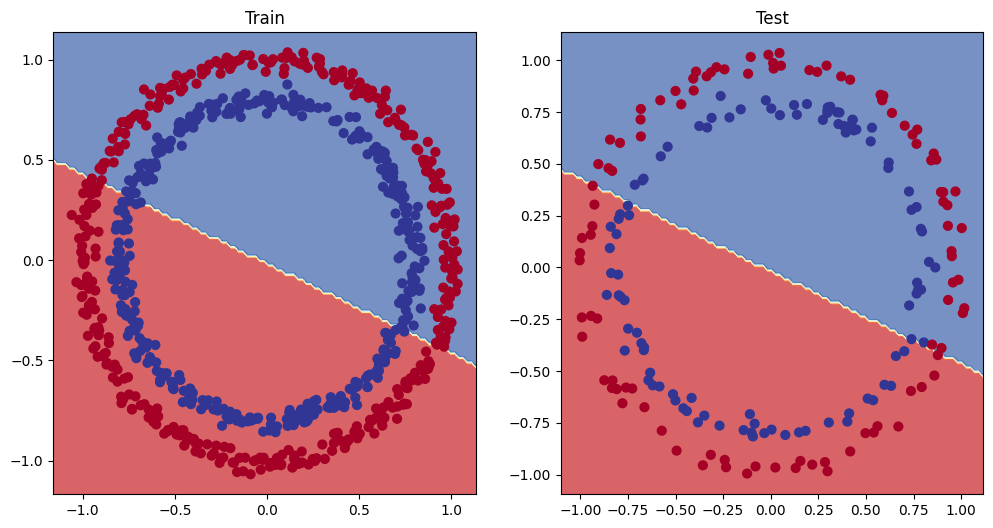

In [244]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [245]:
# still not good.  See if this model would still learn for linear data

In [246]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight*X_regression + bias

X_regression.shape, y_regression.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [247]:
train_split = int(0.8*len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

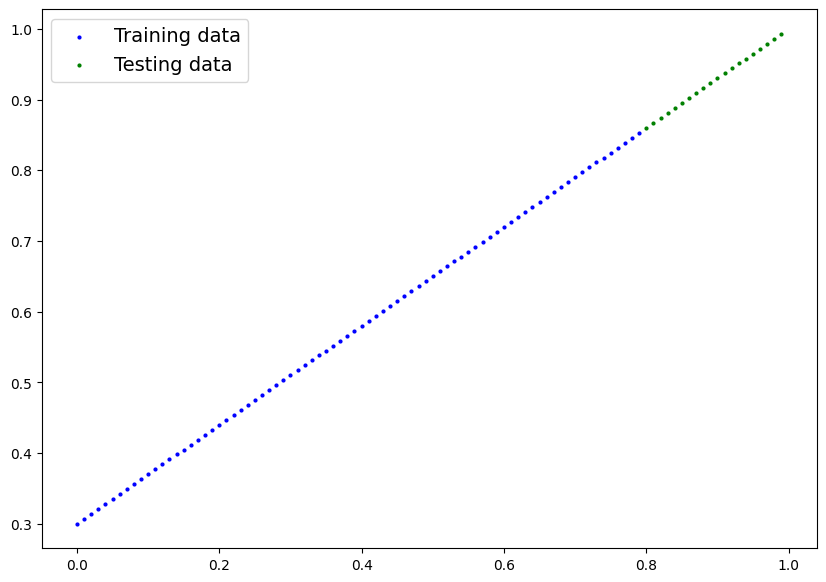

In [248]:
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression)

In [249]:
# need to change # of input features

In [250]:
model_2 = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features = 10, out_features = 1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [251]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.01)

In [252]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


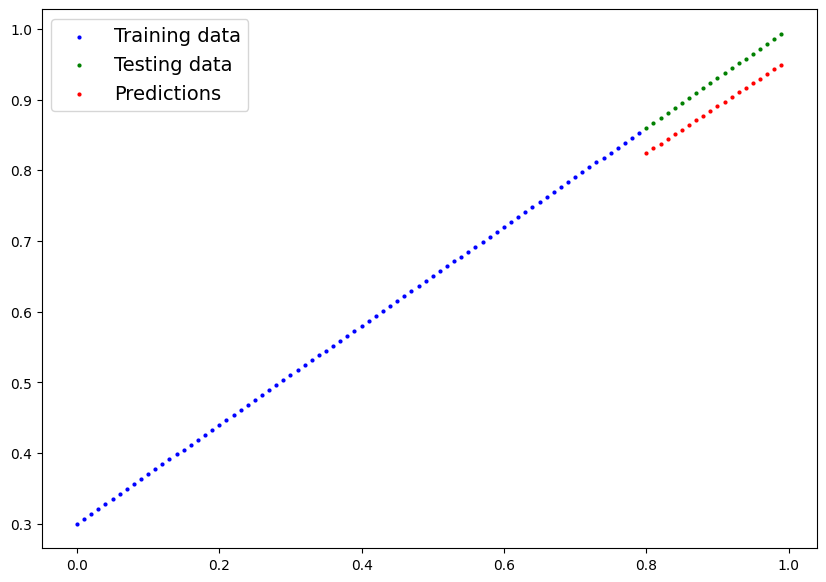

In [253]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data = X_train_regression.cpu(),
                 train_labels = y_train_regression.cpu(),
                 test_data = X_test_regression.cpu(),
                 test_labels = y_test_regression.cpu(),
                 predictions = y_preds.cpu());

In [254]:
# need nonlinearity!

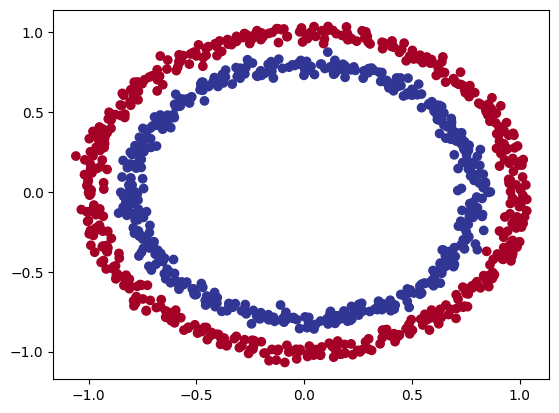

In [255]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [256]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [257]:
# build model with a nonlinear activation function
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [258]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr = 0.1)

In [259]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_3.train()
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.6929, Acc: 50.00% | Test Loss: 0.6932, Test Acc: 50.00
Epoch: 100 | Loss: 0.6912, Acc: 52.88% | Test Loss: 0.6910, Test Acc: 52.50
Epoch: 200 | Loss: 0.6898, Acc: 53.37% | Test Loss: 0.6894, Test Acc: 55.00
Epoch: 300 | Loss: 0.6879, Acc: 53.00% | Test Loss: 0.6872, Test Acc: 56.00
Epoch: 400 | Loss: 0.6852, Acc: 52.75% | Test Loss: 0.6841, Test Acc: 56.50
Epoch: 500 | Loss: 0.6810, Acc: 52.75% | Test Loss: 0.6794, Test Acc: 56.50
Epoch: 600 | Loss: 0.6751, Acc: 54.50% | Test Loss: 0.6729, Test Acc: 56.00
Epoch: 700 | Loss: 0.6666, Acc: 58.38% | Test Loss: 0.6632, Test Acc: 59.00
Epoch: 800 | Loss: 0.6516, Acc: 64.00% | Test Loss: 0.6476, Test Acc: 67.50
Epoch: 900 | Loss: 0.6236, Acc: 74.00% | Test Loss: 0.6215, Test Acc: 79.00


In [260]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

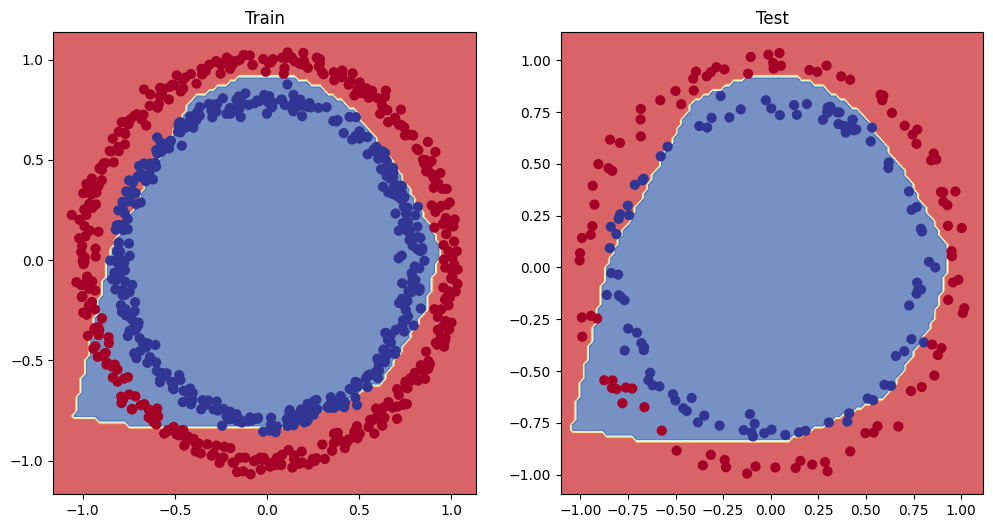

In [261]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

In [262]:
# let's replicate these functions with pure pytorch

In [263]:
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

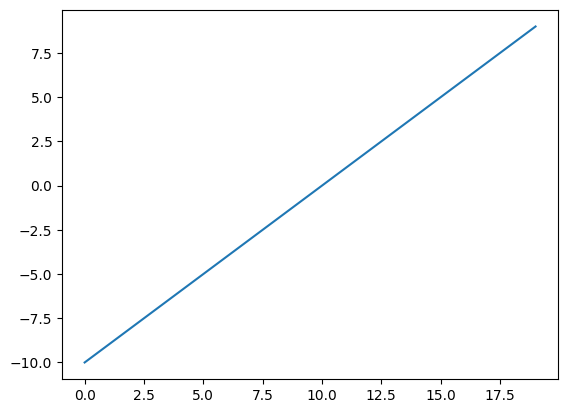

In [264]:
plt.plot(A);

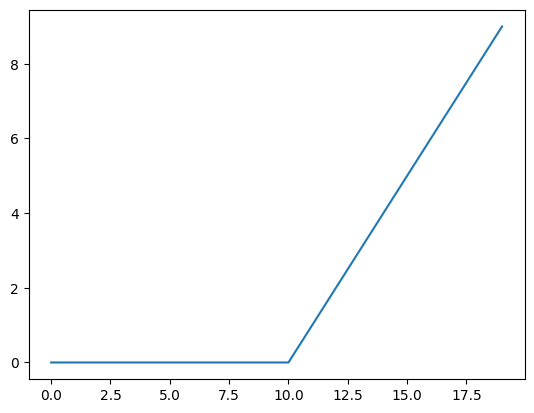

In [265]:
plt.plot(torch.relu(A));

In [266]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

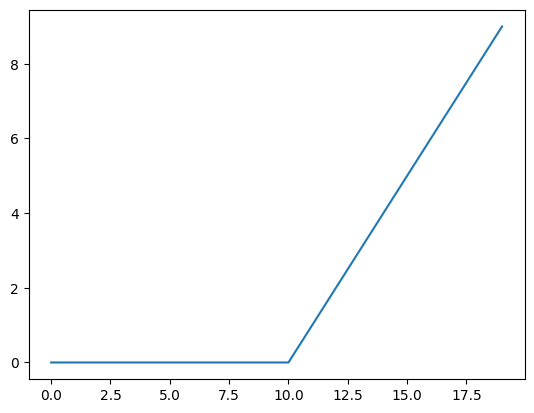

In [267]:
plt.plot(relu(A));

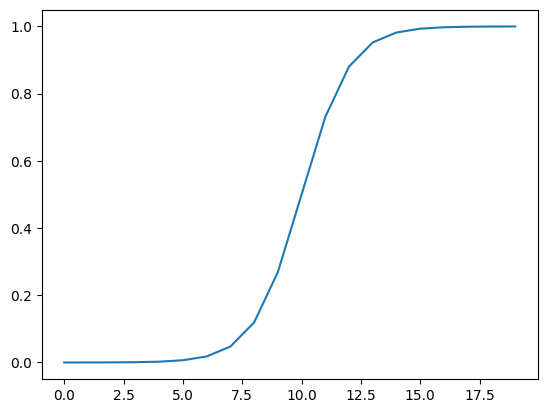

In [268]:
plt.plot(torch.sigmoid(A));

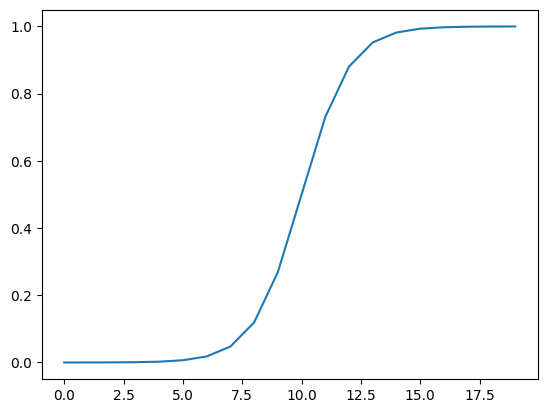

In [269]:
def sigmoid(x):
  return 1 / (1+ torch.exp(-x))

plt.plot(sigmoid(A));

In [270]:
# let's put it all together with a multiclass classification problem

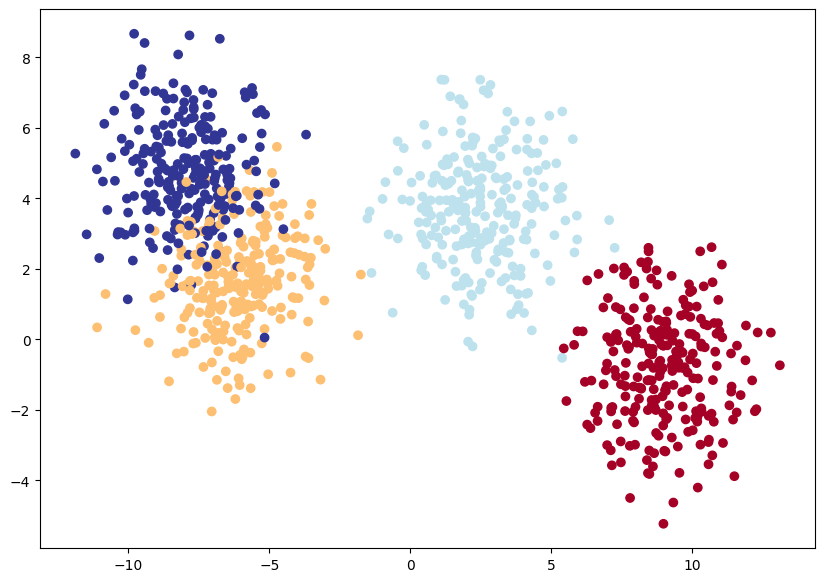

In [271]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 37

X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state = RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = RANDOM_SEED)

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [272]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [273]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """
    Initializes multi-class classification model.

    Args:
      input_features (int): number of input features to the model
      output_features (int): number of output features (number of output classes)
      hidden_units (int): number of hidden units between layers, default 8
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features = 2,
                    output_features = 4,
                    hidden_units = 8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [274]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_4.parameters(),
                            lr = 0.1)

In [275]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.3554, -0.9317, -1.0424, -0.5655],
        [-0.3925, -0.5843, -0.9564, -0.7204],
        [-0.8744, -0.9192, -1.6007, -0.9289],
        [ 0.0296, -0.6641, -0.3002, -0.0517],
        [ 0.1387, -0.4233, -0.0484,  0.0192],
        [ 0.0208, -0.6823, -0.3236, -0.0604],
        [-0.2229, -0.5611, -0.6937, -0.5072],
        [-1.3084, -1.1058, -2.2723, -1.3777],
        [-0.3433, -0.7626, -0.9525, -0.5881],
        [ 0.0080, -0.7142, -0.3449, -0.0604]], device='cuda:0')

In [276]:
y_blob_test[:10]

tensor([2, 2, 0, 3, 1, 1, 2, 0, 2, 3])

In [277]:
# need to turn the model outputs (which are logits right now), need to go from pred probabilities to labels
# use activation function to turn to probabilities

In [278]:
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.3554, -0.9317, -1.0424, -0.5655],
        [-0.3925, -0.5843, -0.9564, -0.7204],
        [-0.8744, -0.9192, -1.6007, -0.9289],
        [ 0.0296, -0.6641, -0.3002, -0.0517],
        [ 0.1387, -0.4233, -0.0484,  0.0192]], device='cuda:0')
tensor([[0.3478, 0.1954, 0.1750, 0.2819],
        [0.3210, 0.2650, 0.1827, 0.2313],
        [0.2953, 0.2823, 0.1428, 0.2796],
        [0.3184, 0.1591, 0.2289, 0.2935],
        [0.3042, 0.1734, 0.2523, 0.2700]], device='cuda:0')


In [279]:
# need to find argmax to get the prediction

In [280]:
torch.argmax(y_pred_probs[0])

tensor(0, device='cuda:0')

In [281]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 0], device='cuda:0')

In [282]:
# time to make training/testing loop

In [283]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train,
                    y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test,
                           y_pred = test_preds)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.4747, Acc: 8.38% | Test Loss: 1.3874, Test Acc: 22.50%
Epoch: 100 | Loss: 0.2830, Acc: 89.38% | Test Loss: 0.3018, Test Acc: 89.00%
Epoch: 200 | Loss: 0.2405, Acc: 90.12% | Test Loss: 0.2563, Test Acc: 91.00%
Epoch: 300 | Loss: 0.2206, Acc: 92.12% | Test Loss: 0.2362, Test Acc: 91.50%
Epoch: 400 | Loss: 0.2043, Acc: 92.25% | Test Loss: 0.2196, Test Acc: 92.00%
Epoch: 500 | Loss: 0.1907, Acc: 92.88% | Test Loss: 0.2064, Test Acc: 93.00%
Epoch: 600 | Loss: 0.1813, Acc: 92.38% | Test Loss: 0.1976, Test Acc: 93.00%
Epoch: 700 | Loss: 0.1696, Acc: 93.00% | Test Loss: 0.1869, Test Acc: 93.00%
Epoch: 800 | Loss: 0.1600, Acc: 93.75% | Test Loss: 0.1773, Test Acc: 93.50%
Epoch: 900 | Loss: 0.1523, Acc: 93.88% | Test Loss: 0.1689, Test Acc: 93.00%


In [284]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits

tensor([[ -8.1765,  -6.2513,   7.6762,  -8.6906],
        [ -3.9488,  -3.8657,   5.7092,  -9.5547],
        [  6.8148,  -7.2017,  -6.1503, -10.0628],
        [ -5.9395,   2.9378,  -5.8916,   2.2741],
        [ -2.8192,   3.6770,  -3.0213,  -0.3652],
        [ -7.2704,   1.7151,  -4.8693,   1.9161],
        [ -4.0788,  -2.6920,   5.4126,  -8.2175],
        [  7.8725, -10.2576,  -6.3133, -13.4830],
        [ -6.2616,  -5.2409,   7.3822,  -9.0916],
        [ -5.2613,   4.2041,  -8.1087,   3.6203],
        [ -5.5629,  -2.0872,   5.2497,  -6.4172],
        [-12.0995,   0.3244,  -9.1910,   6.1272],
        [  2.6063,  -9.7834,   1.0850, -15.6238],
        [ -7.0520,   3.2601,  -8.5818,   4.4069],
        [  4.7897,  -7.4903,  -2.6840, -11.9054],
        [  2.3946,  -7.8935,   1.0827, -13.8599],
        [  6.9640,  -8.9243,  -5.4590, -12.3244],
        [  4.7249,  -6.9753,  -2.8161, -11.2663],
        [ -4.8769,   2.5362,  -3.0748,   0.0673],
        [ -9.2337,   2.6136, -10.4863,   6.2764],


In [285]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.3040e-07, 8.9409e-07, 1.0000e+00, 7.7986e-08],
        [6.3901e-05, 6.9436e-05, 9.9987e-01, 2.3491e-07],
        [1.0000e+00, 8.1786e-07, 2.3405e-06, 4.6788e-08],
        [9.2085e-05, 6.5997e-01, 9.6603e-05, 3.3984e-01],
        [1.4791e-03, 9.8010e-01, 1.2085e-03, 1.7210e-02],
        [5.6300e-05, 4.4962e-01, 6.2128e-04, 5.4970e-01],
        [7.5468e-05, 3.0204e-04, 9.9962e-01, 1.2033e-06],
        [1.0000e+00, 1.3372e-08, 6.9055e-07, 5.3141e-10],
        [1.1873e-06, 3.2950e-06, 1.0000e+00, 7.0071e-08],
        [4.9741e-05, 6.4191e-01, 2.8845e-06, 3.5804e-01]], device='cuda:0')

In [286]:
y_preds = y_pred_probs.argmax(dim=1)
y_preds

tensor([2, 2, 0, 1, 1, 3, 2, 0, 2, 1, 2, 3, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 0,
        0, 1, 0, 2, 3, 1, 2, 1, 3, 0, 1, 3, 2, 3, 0, 0, 2, 2, 2, 3, 2, 0, 1, 1,
        1, 2, 1, 3, 3, 2, 2, 0, 3, 3, 3, 0, 2, 3, 0, 3, 1, 2, 3, 1, 3, 1, 3, 3,
        3, 2, 2, 0, 1, 2, 0, 0, 2, 1, 3, 3, 1, 1, 1, 3, 2, 2, 1, 3, 2, 1, 2, 2,
        2, 2, 3, 3, 0, 3, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 2, 2, 3, 1, 1, 0, 3, 1,
        3, 1, 3, 0, 1, 0, 3, 1, 3, 2, 0, 2, 3, 2, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2,
        2, 1, 0, 3, 0, 2, 2, 2, 3, 2, 2, 0, 3, 0, 0, 3, 1, 2, 0, 2, 3, 3, 0, 3,
        1, 1, 3, 2, 0, 1, 1, 1, 2, 0, 0, 0, 3, 3, 0, 0, 0, 3, 2, 0, 3, 0, 1, 1,
        1, 2, 2, 1, 1, 0, 3, 2], device='cuda:0')

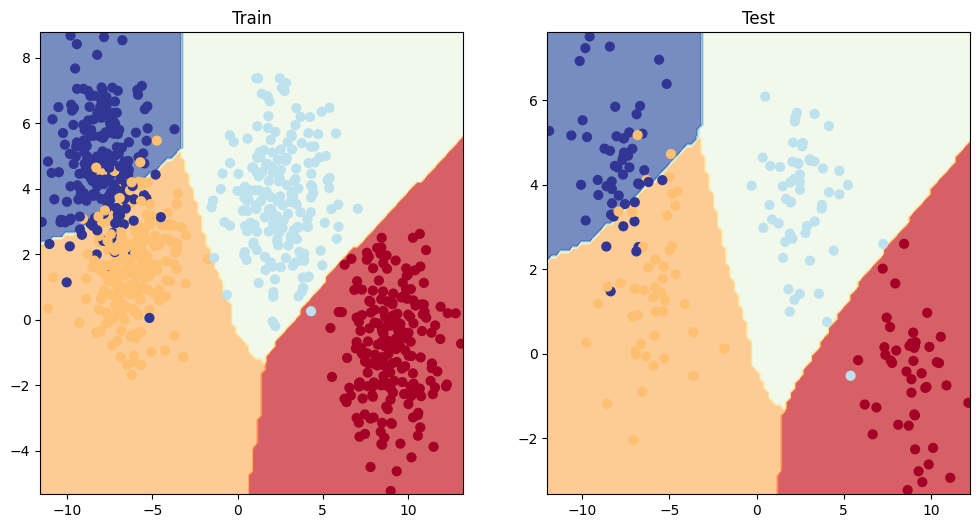

In [287]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [288]:
# we could have used linear model to do this, since you could separate them with straight lines

In [289]:
!pip install torchmetrics

In [290]:
# other classification metrics: precision, recall, F1 score
# can use torchmetrics package for these

In [291]:
from torchmetrics import Accuracy
import torch

torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9350, device='cuda:0')